In [1]:
import pandas as pd
df = pd.read_excel(r"C:\Users\USER\Downloads\movielens_100k_with_genres_clean.xlsx")
print(df.head())
print(df.info())


   userId  movieId  rating  timestamp  age gender  occupation zip_code  \
0     196      242       3  881250949   49      M      writer    55105   
1     186      302       3  891717742   39      F   executive    00000   
2      22      377       1  878887116   25      M      writer    40206   
3     244       51       2  880606923   28      M  technician    80525   
4     166      346       1  886397596   47      M    educator    55113   

                        title release_date  ...  fantasy  film_noir  horror  \
0                Kolya (1996)  24-Jan-1997  ...        0          0       0   
1    L.A. Confidential (1997)  01-Jan-1997  ...        0          1       0   
2         Heavyweights (1994)  01-Jan-1994  ...        0          0       0   
3  Legends of the Fall (1994)  01-Jan-1994  ...        0          0       0   
4         Jackie Brown (1997)  01-Jan-1997  ...        0          0       0   

   musical  mystery  romance  sci_fi  thriller  war  western  
0        0       

In [2]:
df.head()

,userId,movieId,rating,timestamp,age,gender,occupation,zip_code,title,release_date,...,fantasy,film_noir,horror,musical,mystery,romance,sci_fi,thriller,war,western
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,39,F,executive,00000,L.A. Confidential (1997),01-Jan-1997,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,25,M,writer,40206,Heavyweights (1994),01-Jan-1994,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,28,M,technician,80525,Legends of the Fall (1994),01-Jan-1994,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,47,M,educator,55113,Jackie Brown (1997),01-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


In [3]:
print(df.isnull().sum())
print(df.describe())
print(df['gender'].value_counts())
print(df['occupation'].value_counts())


userId          0
movieId         0
rating          0
timestamp       0
age             0
gender          0
occupation      0
zip_code        0
title           0
release_date    9
unknown         0
action          0
adventure       0
animation       0
children        0
comedy          0
crime           0
documentary     0
drama           0
fantasy         0
film_noir       0
horror          0
musical         0
mystery         0
romance         0
sci_fi          0
thriller        0
war             0
western         0
dtype: int64
             userId        movieId         rating     timestamp  \
count  100000.00000  100000.000000  100000.000000  1.000000e+05   
mean      462.48475     425.530130       3.529860  8.835289e+08   
std       266.61442     330.798356       1.125674  5.343856e+06   
min         1.00000       1.000000       1.000000  8.747247e+08   
25%       254.00000     175.000000       3.000000  8.794487e+08   
50%       447.00000     322.000000       4.000000  8.828269e+08

In [4]:
df['release_date'] = df['release_date'].fillna("Unknown")


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')


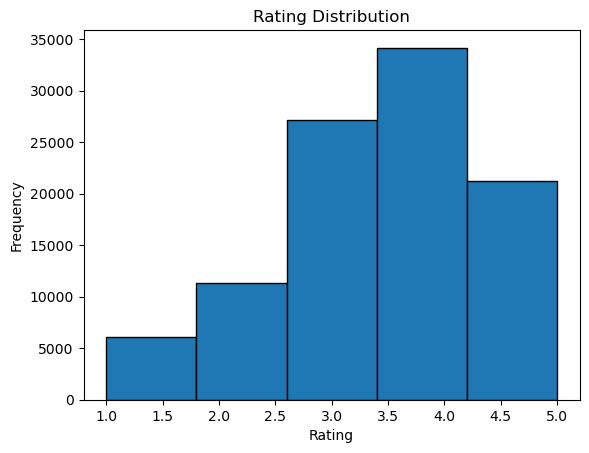

In [6]:
import matplotlib.pyplot as plt

plt.hist(df['rating'], bins=5, edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


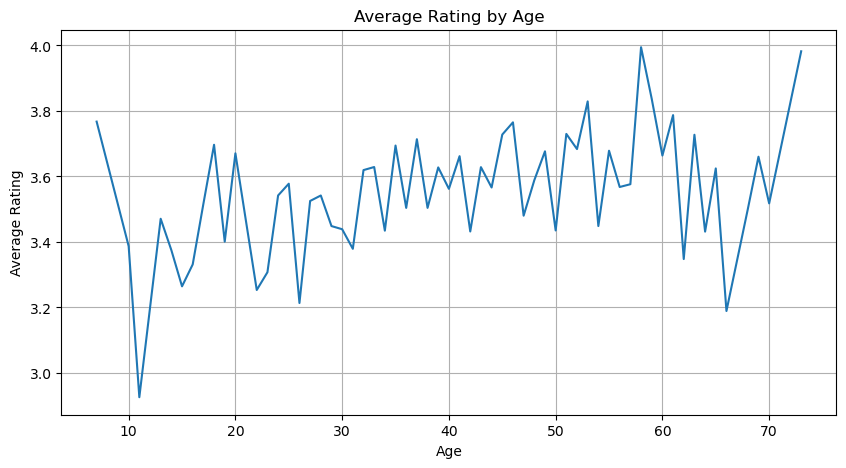

In [7]:
df.groupby('age')['rating'].mean().plot(kind='line', figsize=(10, 5))
plt.title('Average Rating by Age')
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


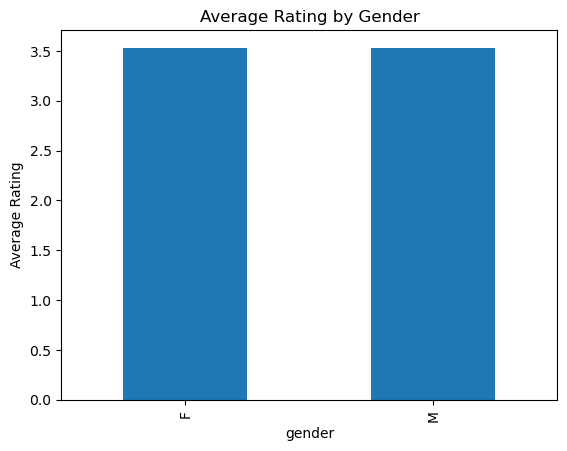

In [8]:
df.groupby('gender')['rating'].mean().plot(kind='bar')
plt.title('Average Rating by Gender')
plt.ylabel('Average Rating')
plt.show()


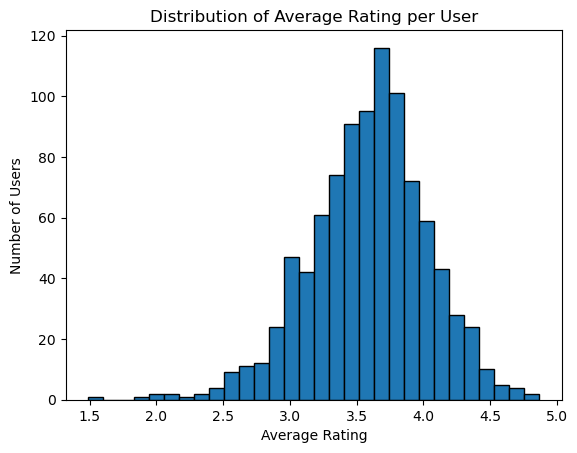

In [9]:
user_avg = df.groupby('userId')['rating'].mean()

plt.hist(user_avg, bins=30, edgecolor='black')
plt.title('Distribution of Average Rating per User')
plt.xlabel('Average Rating')
plt.ylabel('Number of Users')
plt.show()


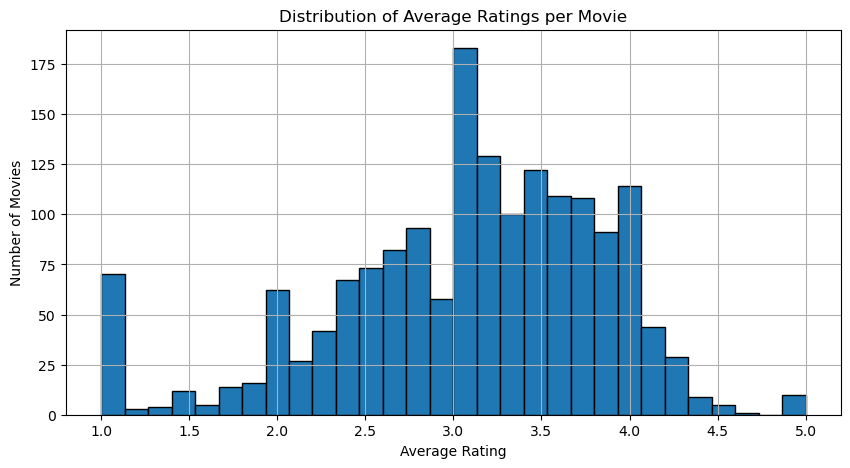

In [10]:
movie_avg = df.groupby('movieId')['rating'].mean()

movie_avg.hist(bins=30, edgecolor='black', figsize=(10, 5))
plt.title('Distribution of Average Ratings per Movie')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.show()



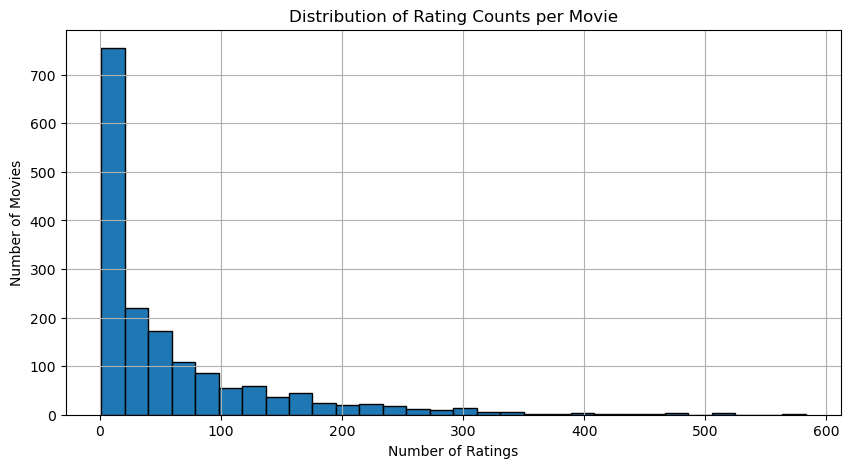

In [11]:
movie_count = df['movieId'].value_counts()

movie_count.hist(bins=30, edgecolor='black', figsize=(10, 5))
plt.title('Distribution of Rating Counts per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Number of Movies')
plt.show()


In [12]:
movie_stats = df.groupby('movieId').agg({
    'rating': ['mean', 'count']
})
movie_stats.columns = ['avg_rating', 'rating_count']
movie_stats = movie_stats.sort_values(by='rating_count', ascending=False)

# En çok oy alan ilk 10 film
print(movie_stats.head(10))


         avg_rating  rating_count
movieId                          
50         4.358491           583
258        3.803536           509
100        4.155512           508
181        4.007890           507
294        3.156701           485
286        3.656965           481
288        3.441423           478
1          3.878319           452
300        3.631090           431
121        3.438228           429


In [13]:
target = 'rating'
df['gender'] = df['gender'].map({'M': 0, 'F': 1})
from sklearn.preprocessing import LabelEncoder

le_occ = LabelEncoder()
df['occupation'] = le_occ.fit_transform(df['occupation'])
df['release_year'] = df['release_date'].apply(lambda x: int(x[-4:]) if x != 'Unknown' else 0)
df['rating_year'] = df['timestamp'].dt.year
['age', 'gender', 'occupation', 'release_year', 'rating_year']


['age', 'gender', 'occupation', 'release_year', 'rating_year']

In [14]:
import numpy as np

numeric_cols = df.select_dtypes(include=[np.number]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)



In [15]:
df['rating_count'] = df.groupby('movieId')['rating'].transform('count')

for col in ['rating_count']:
    upper_cap = df[col].quantile(0.99)
    df.loc[df[col] > upper_cap, col] = upper_cap



In [16]:
df['rating_count_log'] = np.log1p(df['rating_count'])  # Örn: count çok büyükse


In [17]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)


Series([], dtype: int64)


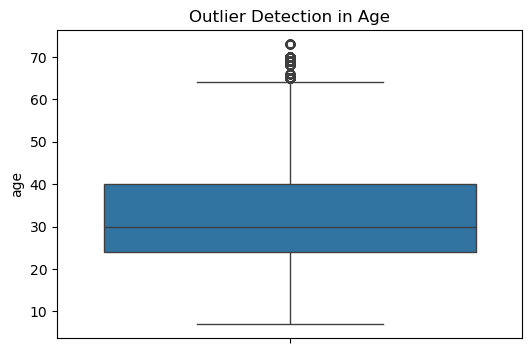

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.boxplot(y=df['age'])
plt.title("Outlier Detection in Age")
plt.show()


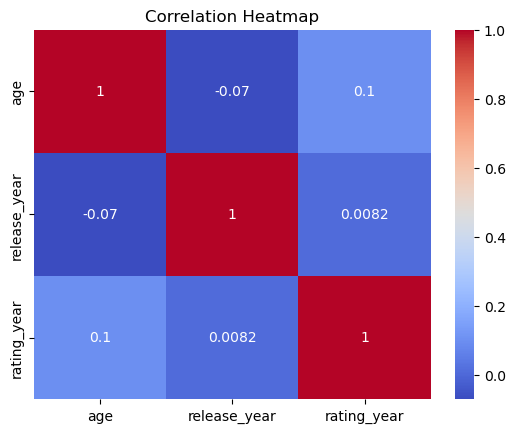

In [19]:
numeric_cols = ['age', 'release_year', 'rating_year']  # varsa

corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


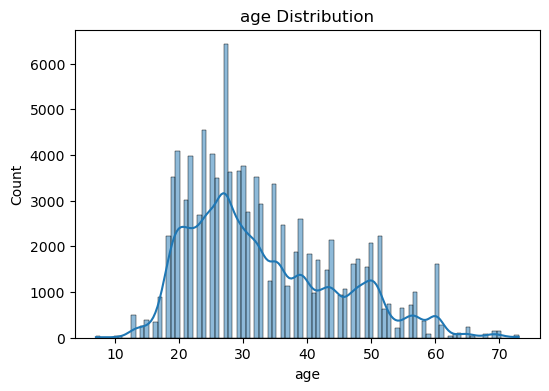

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = ['age']  # varsa

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"{col} Distribution")
    plt.show()


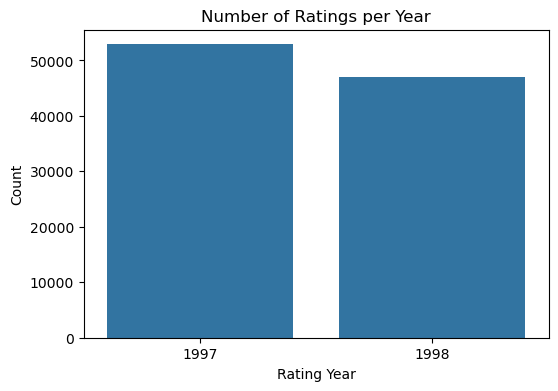

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='rating_year', data=df)
plt.title('Number of Ratings per Year')
plt.xlabel('Rating Year')
plt.ylabel('Count')
plt.show()


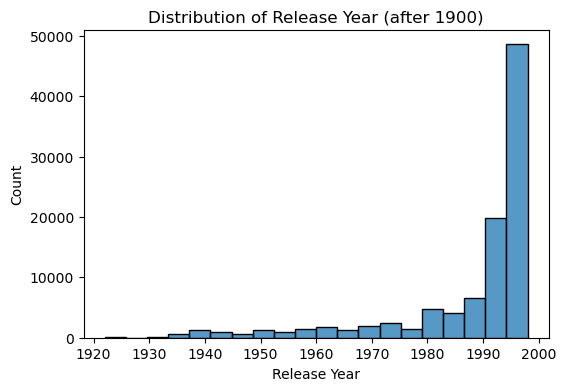

In [22]:
# 0 olan değerleri filtrele (çünkü "Unknown" yıl 0 olarak atanmıştı)
df_filtered = df[df['release_year'] > 1900]

plt.figure(figsize=(6, 4))
sns.histplot(df_filtered['release_year'], bins=20, kde=False)
plt.title('Distribution of Release Year (after 1900)')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.show()


In [23]:
df['rating_count'] = df.groupby('movieId')['rating'].transform('count')
df['ratings_per_year'] = df['rating_count'] / (2025 - df['release_year'].replace(0, 2025))

# Sonuçları görüntülemek için örneğin ilk 5 satırı yazdır:
print(df[['movieId', 'rating_count', 'ratings_per_year']].head(10))



   movieId  rating_count  ratings_per_year
0      242           117          4.178571
1      302           297         10.607143
2      377            13          0.419355
3       51            81          2.612903
4      346           126          4.500000
5      474           194          3.129032
6      265           227          6.485714
7      465            85          2.741935
8      451           170          3.617021
9       86           150          4.687500


In [25]:
last_rating_year = df['rating_year'].max()

# release_year'ın gelecekte olmamasına dikkat et
df['release_year'] = df['release_year'].apply(lambda x: min(x, last_rating_year))

df['ratings_per_year'] = df['rating_count'] / (last_rating_year - df['release_year'] + 1)


In [27]:
import pandas as pd
import numpy as np

class DataProcessor:
    def __init__(self):
        pass

    def fill_missing_values(self, df):
        """Numerical için medyan, kategorik için mod ile doldurur"""
        for col in df.select_dtypes(include=[np.number]).columns:
            if df[col].isnull().sum() > 0:
                df[col].fillna(df[col].median(), inplace=True)
        for col in df.select_dtypes(include=["object"]).columns:
            if df[col].isnull().sum() > 0:
                df[col].fillna(df[col].mode()[0], inplace=True)
        return df

    def convert_release_date(self, df):
        """release_date → release_year (int), Unknown olanlara 0 verilir"""
        df['release_year'] = df['release_date'].apply(lambda x: int(x[-4:]) if x != 'Unknown' else 0)
        return df

    def convert_timestamp(self, df):
        """timestamp sütununu datetime’a çevirip rating_year oluşturur"""
        df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
        df['rating_year'] = df['timestamp'].dt.year
        return df

    def drop_unnecessary_columns(self, df, cols_to_drop=['zip_code']):
        """Kullanılmayan sütunları kaldırır"""
        df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
        return df
processor = DataProcessor()
df = processor.fill_missing_values(df)
df = processor.convert_release_date(df)
df = processor.convert_timestamp(df)
df = processor.drop_unnecessary_columns(df)
#processor = DataProcessor()
#df = processor.process(df)



In [39]:
# Example test script to validate DataProcessor steps
import pandas as pd


# Load your dataset


# Initialize processor
processor = DataProcessor()

# Apply all steps
df = processor.fill_missing_values(df)
df = processor.convert_release_date(df)
df = processor.convert_timestamp(df)
df = processor.drop_unnecessary_columns(df)

# Extra logic (optional)
last_rating_year = df['rating_year'].max()
df['release_year'] = df['release_year'].apply(lambda x: min(x, last_rating_year))
df['ratings_per_year'] = df['rating_count'] / (last_rating_year - df['release_year'] + 1)

# Sanity checks
print(df[['release_date', 'release_year', 'rating_year', 'ratings_per_year']].head())
print("All processing steps completed successfully.")


  release_date  release_year  rating_year  ratings_per_year
0  24-Jan-1997          1997         1997              58.5
1  01-Jan-1997          1997         1998             148.5
2  01-Jan-1994          1994         1997               2.6
3  01-Jan-1994          1994         1997              16.2
4  01-Jan-1997          1997         1998              63.0
All processing steps completed successfully.


In [ ]:
def convert_release_date(self, df):
    """
    Converts 'release_date' to datetime format and creates 'release_year'.
    Dates that can't be parsed will become NaT and year will be 0.
    """
    if 'release_date' in df.columns:
        df['release_date'] = pd.to_datetime(df['release_date'], format='%d-%b-%Y', errors='coerce')
        df['release_year'] = df['release_date'].dt.year.fillna(0).astype(int)
        print("Converted 'release_date' to datetime and extracted 'release_year'")
    else:
        print("'release_date' column not found.")
    return df
bu realease date artirilmis format






import pandas as pd
import numpy as np

class DataProcessor:
    def __init__(self):
        pass

    def fill_missing_values(self, df):
        """Fills missing values: numerical with median, categorical with mode."""
        num_cols = df.select_dtypes(include=[np.number]).columns
        cat_cols = df.select_dtypes(include=["object"]).columns

        for col in num_cols:
            if col in df.columns and df[col].isnull().sum() > 0:
                df[col].fillna(df[col].median(), inplace=True)
                print(f"Filled missing values in numerical column: {col}")

        for col in cat_cols:
            if col in df.columns and df[col].isnull().sum() > 0:
                df[col].fillna(df[col].mode()[0], inplace=True)
                print(f"Filled missing values in categorical column: {col}")

        return df

    def convert_release_date(self, df):
        """Creates a 'release_year' column from 'release_date'. Unknown → 0."""
        if 'release_date' in df.columns:
            df['release_year'] = df['release_date'].apply(
                lambda x: int(x[-4:]) if isinstance(x, str) and x != 'Unknown' and x[-4:].isdigit() else 0
            )
            print("Converted 'release_date' to 'release_year'")
        else:
            print("'release_date' column not found.")
        return df

    def convert_timestamp(self, df):
        """Converts 'timestamp' to datetime and extracts 'rating_year'."""
        if 'timestamp' in df.columns:
            df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s', errors='coerce')
            df['rating_year'] = df['timestamp'].dt.year
            print("Converted 'timestamp' to datetime and created 'rating_year'")
        else:
            print("'timestamp' column not found.")
        return df

    def drop_unnecessary_columns(self, df, cols_to_drop=['zip_code']):
        """Drops unnecessary columns if they exist."""
        existing_cols = [col for col in cols_to_drop if col in df.columns]
        if existing_cols:
            df.drop(columns=existing_cols, inplace=True)
            print(f"Dropped columns: {existing_cols}")
        else:
            print("No columns dropped.")
        return df


In [28]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

class FeatureExtractor:
    def __init__(self, task='regression', encoding_method='label'):
        self.label_encoders = {}
        self.task = task  # 'regression' or 'classification'
        self.encoding_method = encoding_method  # 'label' or 'onehot'

    def preprocess_dates(self, df):
        df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year.fillna(0).astype(int)
        df['rating_year'] = pd.to_datetime(df['timestamp'], unit='s').dt.year
        return df

    def process_genres(self, df):
        if 'genres' not in df.columns:
            print("[Info] 'genres' column not found. Skipping genre processing.")
            return df
        genre_dummies = df['genres'].str.get_dummies(sep='|')
        df = pd.concat([df, genre_dummies], axis=1)
        return df

    def encode_categoricals(self, df, columns=['gender', 'occupation', 'popularity_level']):
        available_columns = [col for col in columns if col in df.columns]
        if self.encoding_method == 'label':
            for col in available_columns:
                le = LabelEncoder()
                df[col] = le.fit_transform(df[col].astype(str))
                self.label_encoders[col] = le
        elif self.encoding_method == 'onehot':
            df = pd.get_dummies(df, columns=available_columns, drop_first=True)
        return df

    def create_derived_features(self, df):
        if 'movieId' in df.columns and 'rating' in df.columns:
            df['rating_count'] = df.groupby('movieId')['rating'].transform('count')
        else:
            df['rating_count'] = 0  # Safe default if required columns are missing

        df['release_year'] = df['release_year'].replace(0, 2024)
        df['ratings_per_year'] = df['rating_count'] / (2025 - df['release_year'])

        # Optional: create popularity_level if rating_count exists
        if 'rating_count' in df.columns:
            bins = [-1, 50, 200, 1000, 5000, float('inf')]
            labels = ['very_low', 'low', 'medium', 'high', 'very_high']
            df['popularity_level'] = pd.cut(df['rating_count'], bins=bins, labels=labels)

        return df

    def create_target(self, df):
        if 'rating' not in df.columns:
            raise ValueError("Column 'rating' is required to create the target.")
        if self.task == 'classification':
            df['target'] = (df['rating'] >= 4).astype(int)
        else:
            df['target'] = df['rating']
        return df

    def select_features(self, df, features=None):
        # Genre columns that may be available
        genre_cols = [col for col in df.columns if col in [
            'Comedy', 'Action', 'Drama', 'Thriller', 'Adventure',
            'Romance', 'Horror', 'Sci-Fi'
        ]]

        base_features = ['age', 'gender', 'occupation', 'release_year',
                         'rating_year', 'rating_count', 'ratings_per_year', 'popularity_level']

        all_available = [col for col in base_features if col in df.columns] + genre_cols

        if features is None:
            features = all_available
        else:
            features = [col for col in features if col in df.columns]

        X = df[features]
        y = df['target']
        return X, y

    def transform(self, df):
        df = self.preprocess_dates(df)

        if 'genres' in df.columns:
            df = self.process_genres(df)

        df = self.create_derived_features(df)

        df = self.encode_categoricals(df)

        df = self.create_target(df)

        X, y = self.select_features(df)
        return X, y



In [29]:
extractor = FeatureExtractor(task='classification', encoding_method='label')
X, y = extractor.transform(df)



In [30]:
# RAM sınırı olmadan çalışacak tam model eğitimi kodu (senin tarafında çalıştırman için)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Özellik çıkarıcıyı başlat
feature_extractor = FeatureExtractor(task='regression', encoding_method='label')

# Veriyi dönüştür
X_fe, y_fe = feature_extractor.transform(df.copy())

# Eğitim/test ayırımı
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.2, random_state=42)

# Random Forest modeli (yüksek n_estimators ile)
rf_model_fe = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_fe.fit(X_train_fe, y_train_fe)

# Tahmin
y_pred_rf_fe = rf_model_fe.predict(X_test_fe)

# RMSE hesapla
rmse_rf_fe = np.sqrt(mean_squared_error(y_test_fe, y_pred_rf_fe))
rmse_rf_fe



1.069817952422139

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Veriyi hazırla
feature_extractor = FeatureExtractor(task='regression')
X, y = feature_extractor.transform(df.copy())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Modeli ve denenecek ayarları belirle
model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# 3. GridSearchCV başlat (cv=3: 3 katlı çapraz doğrulama)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 4. En iyi modeli al ve test setinde dene
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 5. Sonuçları yazdır
print("Best Params:", grid_search.best_params_)
print(f"Test RMSE: {rmse:.4f}")


Best Params: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Test RMSE: 1.0172


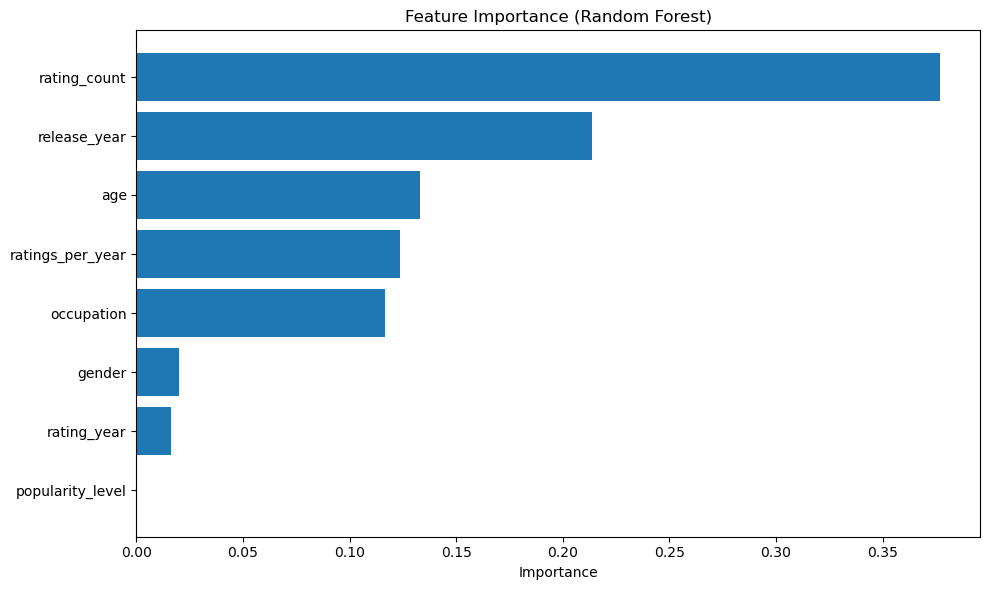

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Özellik isimleri ve önem değerlerini al
importances = best_model.feature_importances_
feature_names = X.columns

# DataFrame'e çevir ve önem sırasına göre sırala
feat_imp = pd.DataFrame({'feature': feature_names, 'importance': importances})
feat_imp = feat_imp.sort_values(by='importance', ascending=True)

# Görselleştir
plt.figure(figsize=(10, 6))
plt.barh(feat_imp['feature'], feat_imp['importance'])
plt.xlabel("Importance")
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()


In [31]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Yeni select_features fonksiyonunu override edelim (mevcut FeatureExtractor bozulmadan)
def custom_select_features(self, df, features=None):
    if features is None:
        genre_cols = [col for col in df.columns if col in [
            'Comedy', 'Action', 'Drama', 'Thriller', 'Adventure',
            'Romance', 'Horror', 'Sci-Fi'
        ]]

        if self.encoding_method == 'onehot':
            cat_cols = [col for col in df.columns if col.startswith('gender_') or
                        col.startswith('occupation_') or col.startswith('popularity_level_')]
        else:
            cat_cols = ['gender', 'occupation', 'popularity_level']

        base_features = ['age', 'release_year', 'rating_year',
                         'rating_count', 'ratings_per_year'] + cat_cols
        features = base_features + genre_cols

    X = df[features]
    y = df['target']
    return X, y

# Yeni select_features fonksiyonunu sınıfa enjekte et
FeatureExtractor.select_features = custom_select_features

# One-hot ile veri dönüştür
feature_extractor = FeatureExtractor(task='regression', encoding_method='onehot')
X, y = feature_extractor.transform(df)

# Eğitim / test bölme
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost eğitimi
model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# Tahmin ve RMSE
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("XGBoost + One-Hot RMSE:", rmse)



XGBoost + One-Hot RMSE: 1.0021429592546391


In [42]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Model ve parametreler
model = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'learning_rate': [0.05, 0.1, 0.2]
}

# GridSearch
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

# En iyi ayar ve performans
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Best Params:", grid_search.best_params_)
print(f"Best XGBoost RMSE: {rmse:.4f}")


Best Params: {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 200}
Best XGBoost RMSE: 0.9750


In [43]:
# 1. Kullanıcı ortalama puanı
if 'userId' in df.columns and 'rating' in df.columns:
    user_avg = df.groupby('userId')['rating'].transform('mean')
    df['user_avg_rating'] = user_avg
else:
    df['user_avg_rating'] = 0  # default

# 2. Film ortalama puanı
if 'movieId' in df.columns and 'rating' in df.columns:
    movie_avg = df.groupby('movieId')['rating'].transform('mean')
    df['movie_avg_rating'] = movie_avg
else:
    df['movie_avg_rating'] = 0  # default


In [44]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# --- 1. Özellik çıkarıcıyı başlat (one-hot + regression) ---
feature_extractor = FeatureExtractor(task='regression', encoding_method='onehot')

# --- 2. transform metoduyla X ve y oluştur ---
X, y = feature_extractor.transform(df.copy())

# --- 3. Eğitim / test ayır ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. XGBoost modelini oluştur ve eğit ---
model = XGBRegressor(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.1,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# --- 5. Tahmin ve RMSE hesapla ---
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost RMSE (with avg ratings): {rmse:.4f}")


XGBoost RMSE (with avg ratings): 0.9734


In [48]:
df['movie_age'] = df['rating_year'] - df['release_year']
df['movie_age'] = df['movie_age'].clip(lower=0)  # negatif varsa düzelt

df['user_rating_count'] = df.groupby('userId')['rating'].transform('count')
df['rating_deviation'] = df['rating'] - df['user_avg_rating']


In [52]:
# Film yaşı
if 'release_year' in df.columns and 'rating_year' in df.columns:
    df['movie_age'] = df['rating_year'] - df['release_year']
    df['movie_age'] = df['movie_age'].clip(lower=0)
else:
    df['movie_age'] = 0

# Puan sapması
if 'rating' in df.columns and 'user_avg_rating' in df.columns:
    df['rating_deviation'] = df['rating'] - df['user_avg_rating']
else:
    df['rating_deviation'] = 0
base_features = [
    'age', 'release_year', 'rating_year', 'movie_age',
    'rating_count', 'ratings_per_year', 'user_avg_rating',
    'movie_avg_rating', 'rating_deviation'
] + list(cat_cols)



In [49]:
import pandas as pd

results = pd.DataFrame({
    'true': y_test,
    'pred': y_pred
})
results['error'] = abs(results['true'] - results['pred'])
print(results.sort_values(by='error', ascending=False).head())


       true      pred     error
32005     5  1.066020  3.933980
32884     5  1.433591  3.566409
20582     1  4.561938  3.561938
46859     1  4.521519  3.521519
56029     1  4.511423  3.511423


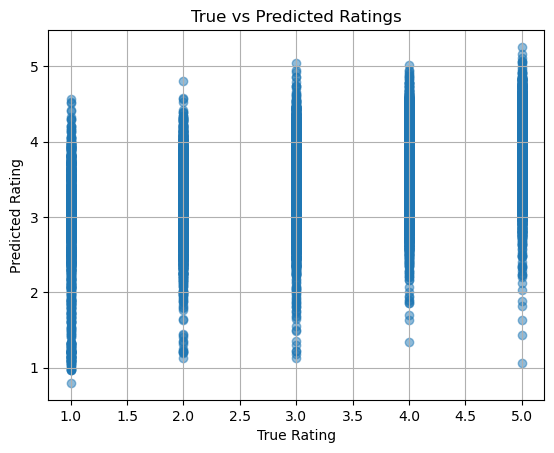

In [50]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True Rating")
plt.ylabel("Predicted Rating")
plt.title("True vs Predicted Ratings")
plt.grid(True)
plt.show()


In [53]:
def create_derived_features(self, df):
    # Rating count
    if 'movieId' in df.columns and 'rating' in df.columns:
        df['rating_count'] = df.groupby('movieId')['rating'].transform('count')
    else:
        df['rating_count'] = 0

    # release_year default fix
    df['release_year'] = df['release_year'].replace(0, 2024)

    # Ratings per year
    current_year = df['rating_year'].max() if 'rating_year' in df else 2025
    df['ratings_per_year'] = df['rating_count'] / (current_year - df['release_year'] + 1)

    # user_avg_rating
    if 'userId' in df.columns and 'rating' in df.columns:
        df['user_avg_rating'] = df.groupby('userId')['rating'].transform('mean')
    else:
        df['user_avg_rating'] = 0

    # movie_avg_rating
    if 'movieId' in df.columns and 'rating' in df.columns:
        df['movie_avg_rating'] = df.groupby('movieId')['rating'].transform('mean')
    else:
        df['movie_avg_rating'] = 0

    # movie_age
    if 'release_year' in df.columns and 'rating_year' in df.columns:
        df['movie_age'] = (df['rating_year'] - df['release_year']).clip(lower=0)
    else:
        df['movie_age'] = 0

    # rating_deviation
    if 'rating' in df.columns and 'user_avg_rating' in df.columns:
        df['rating_deviation'] = df['rating'] - df['user_avg_rating']
    else:
        df['rating_deviation'] = 0

    # popularity_level
    if 'rating_count' in df.columns:
        bins = [-1, 50, 200, 1000, 5000, float('inf')]
        labels = ['very_low', 'low', 'medium', 'high', 'very_high']
        df['popularity_level'] = pd.cut(df['rating_count'], bins=bins, labels=labels)
    
    return df


In [54]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np

# Özellik çıkarıcıyı başlat
feature_extractor = FeatureExtractor(task='regression', encoding_method='onehot')

# Veriyi dönüştür
X, y = feature_extractor.transform(df.copy())

# Eğitim/test ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli eğit
model = XGBRegressor(n_estimators=200, max_depth=8, learning_rate=0.1, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Tahmin ve değerlendirme
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"XGBoost RMSE (with movie_age & deviation): {rmse:.4f}")


XGBoost RMSE (with movie_age & deviation): 0.9734


In [32]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity



# 1. Kullanıcı-film puan matrisi oluştur
user_movie_matrix = df.pivot_table(index='userId', columns='movieId', values='rating')

# 2. Eksik değerleri 0 ile doldur
user_movie_matrix_filled = user_movie_matrix.fillna(0)

# 3. Cosine similarity ile kullanıcı benzerliği
user_similarity = cosine_similarity(user_movie_matrix_filled)
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

# 🔄 Fonksiyon: Belirli bir kullanıcıya öneri yap
def recommend_movies_for_user(target_user_id, top_n_similar_users=5, top_n_recommendations=5):
    # Hedef kullanıcıyla en benzer kullanıcıları al
    similar_users = user_similarity_df[target_user_id].sort_values(ascending=False)[1:top_n_similar_users+1].index

    # Bu kullanıcıların puanladığı filmleri al
    similar_users_ratings = user_movie_matrix.loc[similar_users]

    # Kullanıcının zaten puanladığı filmleri çıkar
    target_user_movies = user_movie_matrix.loc[target_user_id]
    movies_not_seen = target_user_movies[target_user_movies.isnull()].index

    # Benzer kullanıcıların ortalama puanlarına göre sıralama
    avg_ratings = similar_users_ratings[movies_not_seen].mean().sort_values(ascending=False)

    return avg_ratings.head(top_n_recommendations)

# 🧪 Örnek: userId = 10 için 5 film önerisi al
recommendations = recommend_movies_for_user(target_user_id=10)
print("Önerilen filmler (movieId):")
print(recommendations)


Önerilen filmler (movieId):
movieId
1463    5.0
543     5.0
262     5.0
644     5.0
853     5.0
dtype: float64


In [33]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Rating matrisini oluştur
user_movie_matrix = df.pivot_table(index='userId', columns='movieId', values='rating')
user_movie_matrix_filled = user_movie_matrix.fillna(0)

# Cosine similarity hesapla
similarity_matrix = cosine_similarity(user_movie_matrix_filled)
similarity_df = pd.DataFrame(similarity_matrix, index=user_movie_matrix.index, columns=user_movie_matrix.index)

# 🔧 Cosine similarity'e ortak film sayısına göre güven ağırlığı ekle
def apply_similarity_weights(similarity_df, rating_matrix, min_confidence=[(5, 1.0), (3, 0.5), (1, 0.2)]):
    weighted_similarity = similarity_df.copy()

    for u1 in similarity_df.index:
        for u2 in similarity_df.columns:
            if u1 == u2:
                weighted_similarity.loc[u1, u2] = 0
                continue
            common = rating_matrix.loc[u1].notna() & rating_matrix.loc[u2].notna()
            overlap = common.sum()

            weight = 0
            for min_common, w in min_confidence:
                if overlap >= min_common:
                    weight = w
                    break

            weighted_similarity.loc[u1, u2] *= weight

    return weighted_similarity

# Yeni ağırlıklı benzerlik matrisini hesapla
weighted_similarity_df = apply_similarity_weights(similarity_df, user_movie_matrix)

# 🎯 Öneri fonksiyonu (ağırlıklı benzerlik ile)
def recommend_movies_for_user_weighted(user_id, top_n_users=5, top_n_movies=5):
    similar_users = weighted_similarity_df[user_id].sort_values(ascending=False).head(top_n_users).index
    similar_ratings = user_movie_matrix.loc[similar_users]

    # Hedef kullanıcının izlemediği filmleri seç
    user_seen = user_movie_matrix.loc[user_id]
    unseen_movies = user_seen[user_seen.isnull()].index

    # Öneri hesapla: benzer kullanıcıların ortalama puanı
    recommendations = similar_ratings[unseen_movies].mean().sort_values(ascending=False)

    return recommendations.head(top_n_movies)
def user_based_scores(user_id):
    similar_users = weighted_similarity_df[user_id].sort_values(ascending=False).head(top_n_users).index
    similar_ratings = user_movie_matrix.loc[similar_users]

    # Hedef kullanıcının izlemediği filmler
    user_seen = user_movie_matrix.loc[user_id]
    unseen_movies = user_seen[user_seen.isnull()].index

    # Bu filmler için skor üret
    scores = similar_ratings[unseen_movies].mean()

    return scores

# 🧪 Örnek kullanım
recommendations = recommend_movies_for_user_weighted(user_id=10)
print(recommendations)


movieId
1463    5.0
543     5.0
262     5.0
644     5.0
853     5.0
dtype: float64


In [34]:

# Kullanıcıların izlediği filmleri al ve ortalama tür vektörlerini hesapla
def get_user_genre_profile(user_id):
    user_ratings = df[df['userId'] == user_id]
    
    genre_cols = ['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
                  'documentary', 'drama', 'fantasy', 'film_noir', 'horror', 'musical',
                  'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western', 'unknown']
    
    genre_profile = user_ratings[genre_cols].multiply(user_ratings['rating'], axis=0).mean()
    
    return genre_profile

# Skor hesapla: her filmin türü ile kullanıcının tür profili arasındaki kosinüs benzerliği
def genre_based_scores(user_id):
    user_profile = get_user_genre_profile(user_id).values.reshape(1, -1)

    genre_cols = ['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
                  'documentary', 'drama', 'fantasy', 'film_noir', 'horror', 'musical',
                  'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western', 'unknown']
    
    movie_genres = df.drop_duplicates('movieId')[['movieId'] + genre_cols].set_index('movieId')
    similarities = cosine_similarity(movie_genres.values, user_profile).flatten()
    
    genre_scores = pd.Series(similarities, index=movie_genres.index)

    seen_movies = df[df['userId'] == user_id]['movieId'].unique()
    genre_scores = genre_scores.drop(index=seen_movies, errors='ignore')

    return genre_scores.sort_values(ascending=False)

# Örnek: Kullanıcı 10 için tür bazlı skorlar
genre_based_scores(user_id=10).head()


movieId
936     0.799155
778     0.799155
1100    0.799155
1424    0.799155
517     0.799155
dtype: float64

In [35]:
from surprise import SVD, Dataset, Reader
import pandas as pd


# surprise formatı için Reader kullan
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()

# Modeli tanımla ve eğit
model = SVD()
model.fit(trainset)

# Kullanıcıya göre film skorları (izlemediği filmler)
def svd_scores(user_id):
    seen_movies = df[df['userId'] == user_id]['movieId'].unique()
    all_movies = df['movieId'].unique()
    unseen = [m for m in all_movies if m not in seen_movies]
    
    preds = [model.predict(user_id, mid) for mid in unseen]
    scores = pd.Series({p.iid: p.est for p in preds})
    return scores.sort_values(ascending=False)

# Kullanıcı 10 için örnek
scores = svd_scores(user_id=10)
print(scores.head())


318    4.904163
169    4.889258
272    4.876675
427    4.780283
114    4.740112
dtype: float64


In [36]:
# Kernel reset olduğu için tekrar baştan başlıyoruz
# Gerekli kütüphaneleri içe aktaralım ve dosyayı tekrar yükleyelim
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from surprise import SVD, Dataset, Reader


# Rating matrisi
user_movie_matrix = df.pivot_table(index='userId', columns='movieId', values='rating')
user_movie_matrix_filled = user_movie_matrix.fillna(0)

# Cosine similarity
similarity_matrix = cosine_similarity(user_movie_matrix_filled)
similarity_df = pd.DataFrame(similarity_matrix, index=user_movie_matrix.index, columns=user_movie_matrix.index)

# Benzerlik ağırlığı
def apply_similarity_weights(similarity_df, rating_matrix, min_confidence=[(5, 1.0), (3, 0.5), (1, 0.2)]):
    weighted_similarity = similarity_df.copy()
    for u1 in similarity_df.index:
        for u2 in similarity_df.columns:
            if u1 == u2:
                weighted_similarity.loc[u1, u2] = 0
                continue
            common = rating_matrix.loc[u1].notna() & rating_matrix.loc[u2].notna()
            overlap = common.sum()
            weight = 0
            for min_common, w in min_confidence:
                if overlap >= min_common:
                    weight = w
                    break
            weighted_similarity.loc[u1, u2] *= weight
    return weighted_similarity

weighted_similarity_df = apply_similarity_weights(similarity_df, user_movie_matrix)

# User-based skor
def user_based_scores(user_id, top_n_users=5):
    similar_users = weighted_similarity_df[user_id].sort_values(ascending=False).head(top_n_users).index
    similar_ratings = user_movie_matrix.loc[similar_users]
    user_seen = user_movie_matrix.loc[user_id]
    unseen_movies = user_seen[user_seen.isnull()].index
    scores = similar_ratings[unseen_movies].mean()
    return scores.dropna()

# Genre-based skor
def get_user_genre_profile(user_id):
    genre_cols = ['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
                  'documentary', 'drama', 'fantasy', 'film_noir', 'horror', 'musical',
                  'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western', 'unknown']
    user_ratings = df[df['userId'] == user_id]
    genre_profile = user_ratings[genre_cols].multiply(user_ratings['rating'], axis=0).mean()
    return genre_profile

def genre_based_scores(user_id):
    user_profile = get_user_genre_profile(user_id).values.reshape(1, -1)
    genre_cols = ['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
                  'documentary', 'drama', 'fantasy', 'film_noir', 'horror', 'musical',
                  'mystery', 'romance', 'sci_fi', 'thriller', 'war', 'western', 'unknown']
    movie_genres = df.drop_duplicates('movieId')[['movieId'] + genre_cols].set_index('movieId')
    similarities = cosine_similarity(movie_genres.values, user_profile).flatten()
    genre_scores = pd.Series(similarities, index=movie_genres.index)
    seen_movies = df[df['userId'] == user_id]['movieId'].unique()
    genre_scores = genre_scores.drop(index=seen_movies, errors='ignore')
    return genre_scores.sort_values(ascending=False)

# SVD modeli kur
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df[['userId', 'movieId', 'rating']], reader)
trainset = data.build_full_trainset()
svd_model = SVD()
svd_model.fit(trainset)

# SVD skor fonksiyonu
def svd_scores(user_id):
    seen_movies = df[df['userId'] == user_id]['movieId'].unique()
    all_movies = df['movieId'].unique()
    unseen = [m for m in all_movies if m not in seen_movies]
    preds = [svd_model.predict(user_id, mid) for mid in unseen]
    scores = pd.Series({p.iid: p.est for p in preds})
    return scores.sort_values(ascending=False)

# Final skor birleştirme
def final_scores(user_id, w_user=0.4, w_genre=0.3, w_svd=0.3):
    s_user = user_based_scores(user_id)
    s_genre = genre_based_scores(user_id)
    s_svd = svd_scores(user_id)
    
    all_movie_ids = set(s_user.index) | set(s_genre.index) | set(s_svd.index)
    final = pd.Series(index=all_movie_ids, dtype='float64')
    for movie_id in all_movie_ids:
        score = (
            w_user * s_user.get(movie_id, 0) +
            w_genre * s_genre.get(movie_id, 0) +
            w_svd * s_svd.get(movie_id, 0)
        )
        final[movie_id] = score

    return final.sort_values(ascending=False)

# Kullanıcı 10 için final öneriler
final_scores(10).head(10)


8      3.499508
262    3.453651
187    3.422623
316    3.404504
543    3.342638
408    3.335209
481    3.330629
318    3.318419
427    3.317973
315    3.313139
dtype: float64